In [27]:
!pip install Biopython

In [44]:
from Bio import AlignIO
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw
from Bio import SeqIO
from Bio import Phylo, AlignIO
import subprocess
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from Bio.Align.Applications import ClustalOmegaCommandline

In [30]:
os.listdir('/content/sample_data/sequences')

['Rhinolophus ferrumequinum.fasta',
 'clustal-omega-1.2.3-macosx',
 'Branta canadensis.fasta',
 '.ipynb_checkpoints',
 'Camelus.fasta',
 'all.fasta',
 'Mareca.fasta',
 'Gallus gallus.fasta',
 'Homo sapiens.fasta',
 'Delphinapterus leucas.fasta']

In [31]:
Branta_canadensis = SeqIO.read("/content/sample_data/sequences/Branta canadensis.fasta", "fasta") #Ghoose
Camelus = SeqIO.read("/content/sample_data/sequences/Camelus.fasta", "fasta") #Camelus
Delphinapterus_leucas = SeqIO.read("/content/sample_data/sequences/Delphinapterus leucas.fasta", "fasta") #Delphinapterus leucas
Gallus_gallus = SeqIO.read("/content/sample_data/sequences/Gallus gallus.fasta", "fasta")# Gallus gallus
Homo_sapiens = SeqIO.read('/content/sample_data/sequences/Homo sapiens.fasta', 'fasta') # H. Sapiens MERS
Mareca = SeqIO.read('/content/sample_data/sequences/Mareca.fasta', 'fasta') #Mareca
Rhinolophus_ferrumequinum = SeqIO.read('/content/sample_data/sequences/Rhinolophus ferrumequinum.fasta', 'fasta')#Rhinolophus ferrumequinum

In [32]:
#Create list of above sequence:
list_record = [Branta_canadensis, Camelus, Delphinapterus_leucas, Gallus_gallus, Homo_sapiens, Mareca, Rhinolophus_ferrumequinum]

In [33]:
#reads = SeqIO.parse(file,"fasta")
end = []

for record in list_record:
    #record[:n].append(end)
    end.append(record)
    
SeqIO.write(end, "/content/sample_data/sequences/all.fasta", "fasta")

7

In [34]:
# Define input file
in_file = "/content/sample_data/sequences/all.fasta"

In [35]:
# Define output file
out_file = "/content/sample_data/sequences/aligned.fasta"

In [36]:
# Get the command for Clustal Omega
clustalomega_cline = ClustalOmegaCommandline(infile=in_file, outfile=out_file, verbose=True, auto=True)

In [38]:
# Print the executable command
print(clustalomega_cline)

clustalo -i /content/sample_data/sequences/all.fasta -o /content/sample_data/sequences/aligned.fasta --auto -v


In [43]:
!./clustalo-1.2.2-FreeBSD-x86-64 -i /content/sample_data/sequences/all.fasta -o /content/sample_data/sequences/aligned.fasta --auto --force  -v

/bin/bash: ./clustalo-1.2.2-FreeBSD-x86-64: No such file or directory


In [46]:
!pip install pysam

     |████████████████████████████████| 10.0MB 3.0MB/s 


In [50]:
from pysam import FastxFile


fasta_q_file =  "/content/sample_data/sequences/all.fasta"
out_filename = "/content/sample_data/sequences/output.fasta"
size_size_trim = 250


with FastxFile(fasta_q_file) as fh, open(out_filename, mode='w') as fout:
    for entry in fh:
        sequence_id = entry.name
        sequence = entry.sequence

        if len(sequence) > size_size_trim:
            fout.write(">{}trimmed_to{}_bp\n{}\n".format(size_size_trim,sequence_id, sequence[:size_size_trim]))

        else:
            if len(sequence) == size_size_trim:
                fout.write(">{}\n{}\n".format(sequence_id, sequence[:size_size_trim]))
            else:
                # sequences shorter than `size_size_trim` are not written.
                continue

In [51]:
align = AlignIO.read("/content/sample_data/sequences/output.fasta", "fasta")
print(align)

SingleLetterAlphabet() alignment with 7 rows and 250 columns
ACTTTGAGCATTGATATATATATATATATATCATACTCACCTTG...CTC 250trimmed_toBranta_bp
ACTTAAGTGTCTTATCTATCTATAGATAGAAAAGTCGCTTTTTA...GTG 250trimmed_toCamelus_bp
CTATTTGTGAATAATATATATATATATATATATCATTCATTCGT...ACA 250trimmed_toDelphinapterus_bp
ACTTAAGATAGATATTAATATATATCTATCACACTAGCCTTGCG...CGT 250trimmed_toGallus_bp
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...GTG 250trimmed_toHomo_bp
GTCATTTGGTAAAATATAATATATATTTTATCACTCTAGCTTCG...CTT 250trimmed_toMareca_bp
AAGTGTCGTGCTCCTAGGGGTTGCACTTGACGTGTTCCGTCACG...TTT 250trimmed_toRhinolophus_bp


**Calculate distance:**

In [61]:
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)

**Create the Phylogenetic Tree**

In [62]:
def label(leaf):
    global name
    if leaf.name.startswith('Inner'):
        name=''
    else:
        for i in range(len(code)):
            if leaf.name.startswith(code[i]):
                name=leaf.name+" | "+location[i]
    return name

In [63]:
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

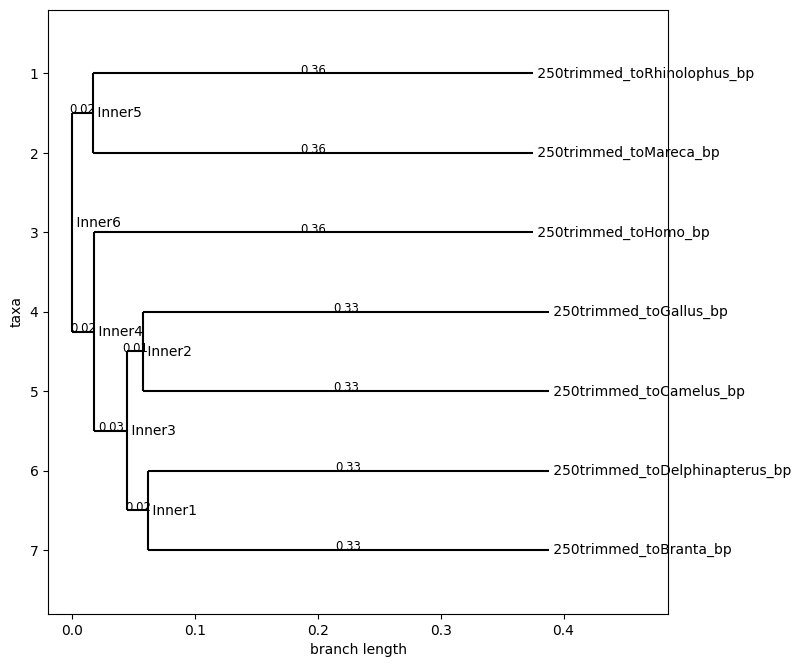

In [66]:
fig = plt.figure(figsize=(8, 8), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes, 
           branch_labels=lambda c: round(c.branch_length, 2), do_show=False)